<font color='green' size=5> **Загрузка данных**

In [ ]:
!gdown 1pUByjB_40oNFrs5REHOeOPWpcHG9o1bm

Downloading...
From: https://drive.google.com/uc?id=1pUByjB_40oNFrs5REHOeOPWpcHG9o1bm
To: /content/titanic.csv
100% 61.2k/61.2k [00:00<00:00, 44.7MB/s]


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/titanic.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<font color='green' size=5> **Обнаружение пропусков**

In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
df.describe(include='all').T['count']

,count
PassengerId,891.0
Survived,891.0
Pclass,891.0
Name,891
Sex,891
Age,714.0
SibSp,891.0
Parch,891.0
Ticket,891
Fare,891.0


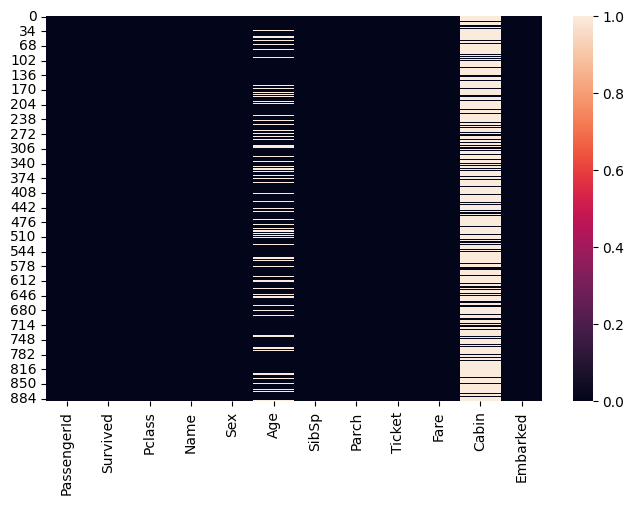

In [ ]:
plt.figure(figsize=(8,5))
sns.heatmap(df.isna())
plt.show()

<font color='green' size=5> **Удаление пропусков**

>параметр thresh используется для определения минимального количества ненулевых значений, которые должны присутствовать в строке или столбце, чтобы они не были удалены, то есть

 это параметр указывает, что нужно оставить только те столбцы, в которых не менее thresh непустых значений. То есть, если в столбце есть менее thresh ненулевых значений, он будет удалён.

In [ ]:
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
df.shape[0]

891

In [ ]:
df.dropna(thresh = df.shape[0], axis=1).isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
df.dropna(thresh = df.shape[0] // 2, axis=1).isna().sum()

# df = df.dropna(thresh = df.shape[0] // 2, axis=1)

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
df.shape[1]

12

`thresh=df.shape[1]` — этот параметр указывает, что нужно оставить только те строки, в которых не менее df.shape[1] (количество столбцов) ненулевых значений. Таким образом, если строка имеет хотя бы одно NaN, она будет удалена, поскольку она не будет соответствовать требованию (если количество столбцов, например, 5, то строка должна содержать 5 ненулевых значений).

In [ ]:
df.dropna(thresh = df.shape[1], axis=0).isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
df.dropna(thresh = df.shape[1], axis=0, inplace=True)

In [ ]:
1 - df.shape[0] / init_shape[0]

0.2008978675645342

<font color='green' size=5> **Заполнение пропусков**

In [ ]:
df = pd.read_csv('/content/titanic.csv')

In [ ]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

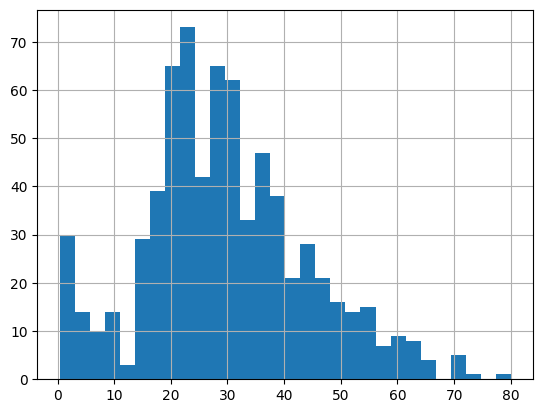

In [ ]:
df['Age'].hist(bins=30)

In [ ]:
df['Age'].median(), df['Age'].mean()

(28.0, 29.69911764705882)

In [ ]:
 df['Age'].fillna(df['Age'].median(), inplace=True)

In [ ]:
 df['Age'].isna().sum()

0

In [ ]:
 df['Cabin'].isna().sum()

687

In [ ]:
df['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [ ]:
df['Cabin'].mode()

0        B96 B98
1    C23 C25 C27
2             G6
Name: Cabin, dtype: object

In [ ]:
 df['Cabin'].fillna('UNK', inplace=True)

In [ ]:
df['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [ ]:
print(f'mode for Embarked is {df.Embarked.mode()}')

df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

mode for Embarked is 0    S
Name: Embarked, dtype: object


In [ ]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [ ]:
df = pd.read_csv('/content/titanic.csv')

In [ ]:
df['Age_no_nan'] = df['Age'].interpolate(method='linear')

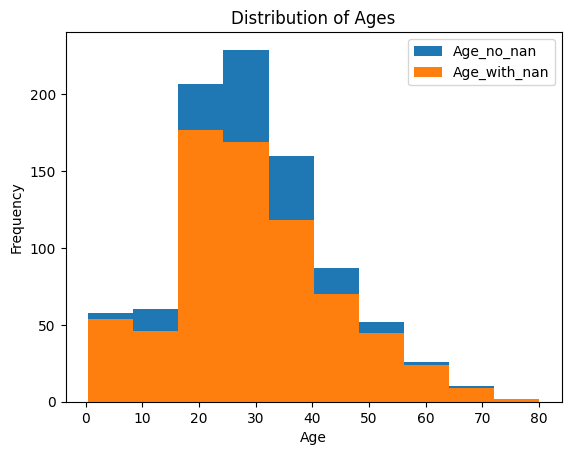

In [ ]:
plt.hist(df['Age_no_nan'], label='Age_no_nan')
plt.hist(df['Age'], label='Age_with_nan')
plt.legend()

plt.title('Distribution of Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.show()

<font color='green' size=5> **создадим индикативные переменные**

In [ ]:
df['Age'].isna().sum()

177

In [ ]:
df['is_na_age'] = df['Age'].map(lambda x: 1 if pd.isna(x) else 0)

In [ ]:
df[df['is_na_age'] != 1]['Age'].isna().sum()

0

In [ ]:
df[df['is_na_age'] == 1]['Age'].isna().sum()

177

<font color='green' size=5> **интерполяция**

>https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.interpolate.html

In [ ]:
import statsmodels.api as sm
import numpy as np

In [ ]:
df = sm.datasets.sunspots.load_pandas().data

<Axes: xlabel='YEAR', ylabel='SUNACTIVITY'>

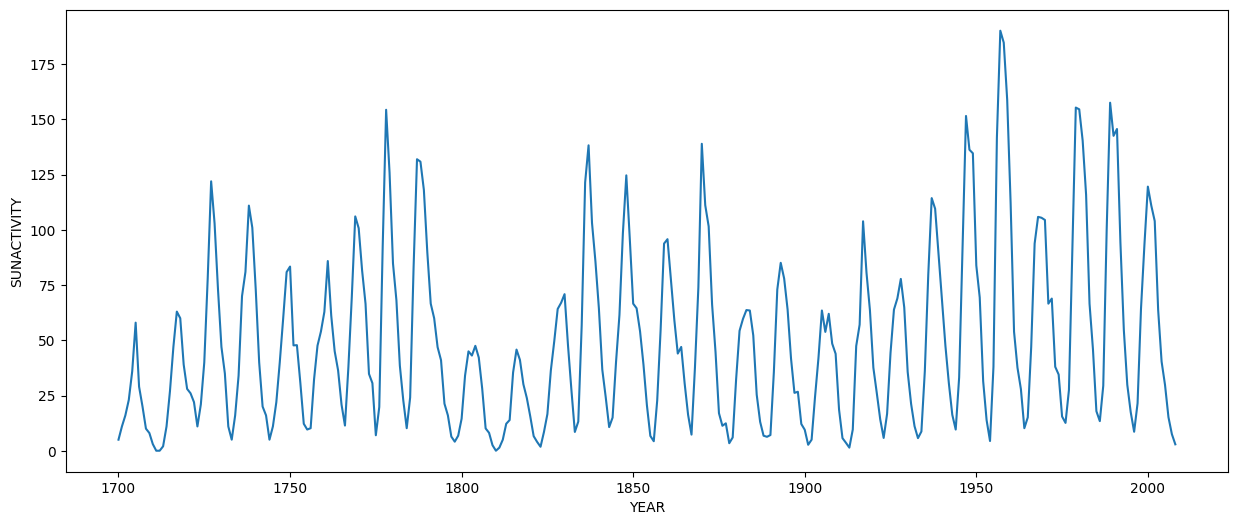

In [ ]:
plt.figure(figsize=(15,6))
sns.lineplot(df, x = 'YEAR', y = 'SUNACTIVITY')

In [ ]:
df['SUNACTIVITY_NAN'] = df['SUNACTIVITY']

In [ ]:
df['SUNACTIVITY_NAN'].loc[1:3]=np.NaN
df['SUNACTIVITY_NAN'].loc[30:33]=np.NaN
df['SUNACTIVITY_NAN'].loc[100:103]=np.NaN

In [ ]:
df['SUNACTIVITY_NAN'].isna().sum()

11

<Axes: xlabel='YEAR', ylabel='SUNACTIVITY'>

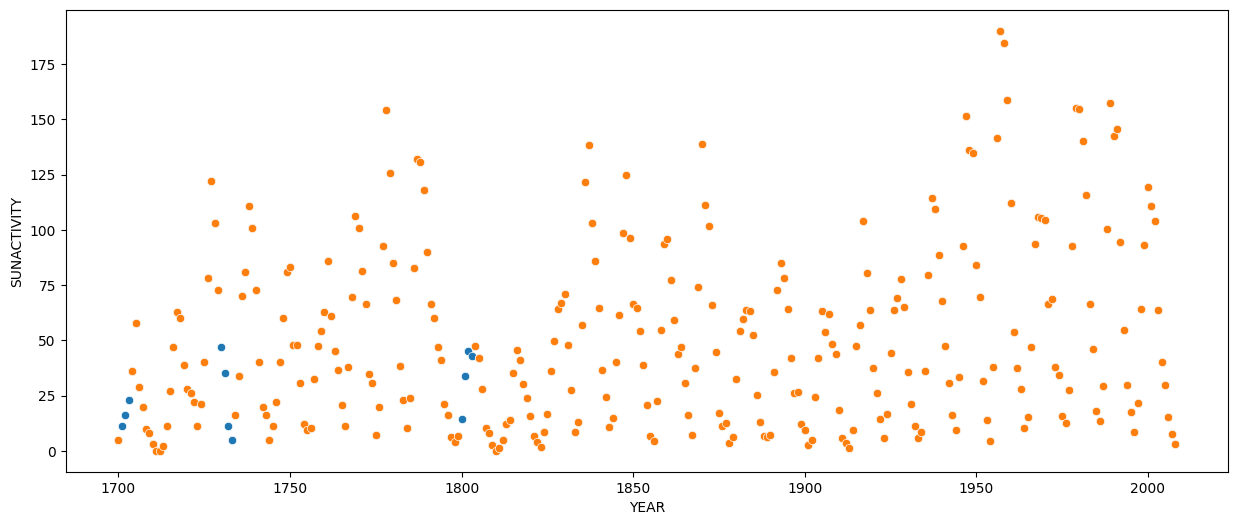

In [ ]:
plt.figure(figsize=(15,6))
sns.scatterplot(df, x = 'YEAR', y = 'SUNACTIVITY')
sns.scatterplot(df, x = 'YEAR', y = 'SUNACTIVITY_NAN')

In [ ]:
df['SUNACTIVITY_NO_NAN'] = df['SUNACTIVITY_NAN'].interpolate()

In [ ]:
df

,YEAR,SUNACTIVITY,SUNACTIVITY_NAN,SUNACTIVITY_NO_NAN
0,1700.0,5.0,5.0,5.00
1,1701.0,11.0,NaN,12.75
2,1702.0,16.0,NaN,20.50
3,1703.0,23.0,NaN,28.25
4,1704.0,36.0,36.0,36.00
...,...,...,...,...
304,2004.0,40.4,40.4,40.40
305,2005.0,29.8,29.8,29.80
306,2006.0,15.2,15.2,15.20
307,2007.0,7.5,7.5,7.50


(x1, y1) (x2, y2)

$\frac {x-x1}{x2-x1} = \frac {y-y1} {y2-y1}$

<Axes: xlabel='YEAR', ylabel='SUNACTIVITY'>

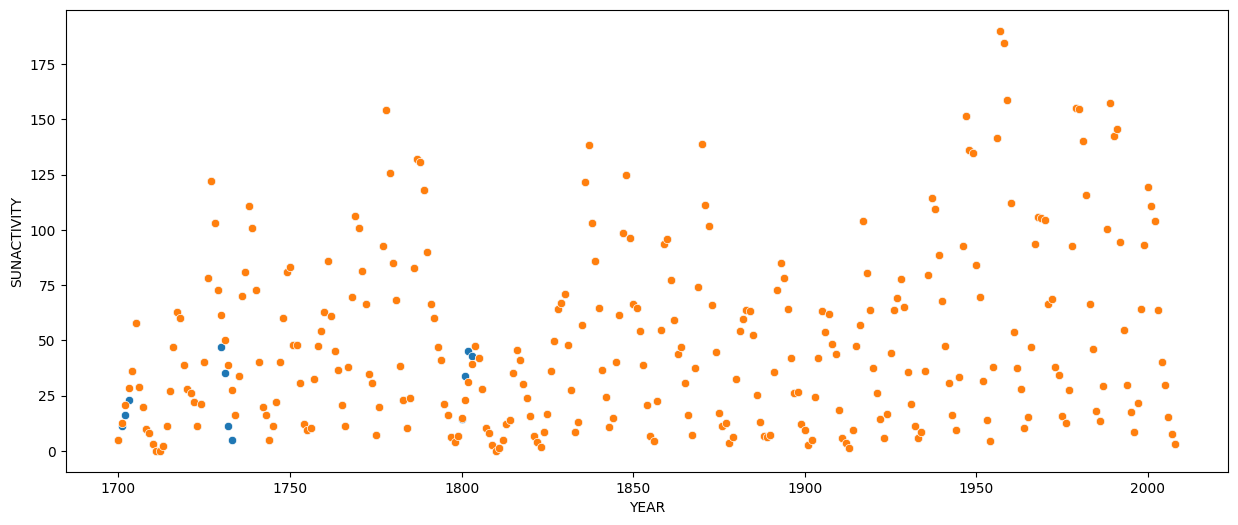

In [ ]:
plt.figure(figsize=(15,6))
sns.scatterplot(df, x = 'YEAR', y = 'SUNACTIVITY')
sns.scatterplot(df, x = 'YEAR', y = 'SUNACTIVITY_NO_NAN')

In [ ]:
np.mean(abs(df['SUNACTIVITY_NO_NAN'] - df['SUNACTIVITY'])/df['SUNACTIVITY'])

0.029952016276074942

In [ ]:
df['SUNACTIVITY_NO_NAN_2'] = df['SUNACTIVITY_NAN'].interpolate(method='pad', limit=2)

In [ ]:
df

,YEAR,SUNACTIVITY,SUNACTIVITY_NAN,SUNACTIVITY_NO_NAN,SUNACTIVITY_NO_NAN_2
0,1700.0,5.0,5.0,5.00,5.0
1,1701.0,11.0,NaN,12.75,5.0
2,1702.0,16.0,NaN,20.50,5.0
3,1703.0,23.0,NaN,28.25,NaN
4,1704.0,36.0,36.0,36.00,36.0
...,...,...,...,...,...
304,2004.0,40.4,40.4,40.40,40.4
305,2005.0,29.8,29.8,29.80,29.8
306,2006.0,15.2,15.2,15.20,15.2
307,2007.0,7.5,7.5,7.50,7.5


<Axes: xlabel='YEAR', ylabel='SUNACTIVITY_NO_NAN_2'>

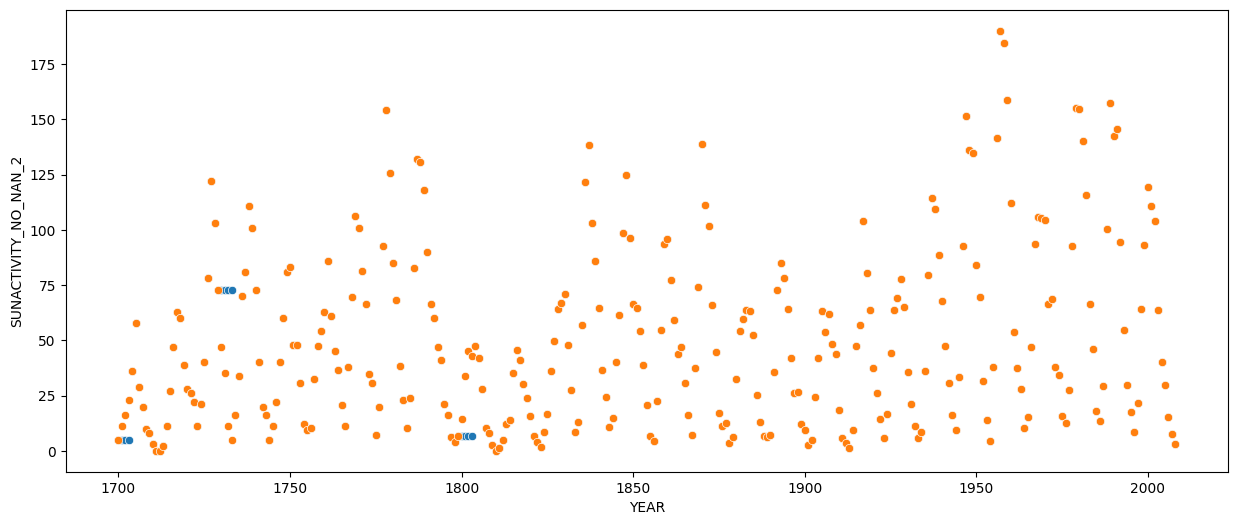

In [ ]:
plt.figure(figsize=(15,6))

sns.scatterplot(df, x = 'YEAR', y = 'SUNACTIVITY_NO_NAN_2')
sns.scatterplot(df, x = 'YEAR', y = 'SUNACTIVITY')

In [ ]:
np.mean(abs(df['SUNACTIVITY_NO_NAN_2'] - df['SUNACTIVITY'])/df['SUNACTIVITY'])

0.0846829522953729

In [ ]:
df['SUNACTIVITY_NO_NAN_3'] = df['SUNACTIVITY_NAN'].interpolate(method='polynomial', order=2)

In [ ]:
np.mean(abs(df['SUNACTIVITY_NO_NAN_3'] - df['SUNACTIVITY'])/df['SUNACTIVITY'])

0.01567380461397564